<a href="https://colab.research.google.com/github/O-Kpy/Project/blob/main/%E1%84%80%E1%85%B5%E1%84%89%E1%85%A1%E1%86%BC%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5(%E1%84%91%E1%85%A9%E1%86%A8%E1%84%8B%E1%85%A7%E1%86%B7)_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D(project2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
!apt-get update -qq  ## 나눔 설치
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [16]:
import matplotlib as mpl
import matplotlib.font_manager as fm   ## 폰트 매니저
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font) 
mpl.font_manager._rebuild()

# Read Me

---

- 개 더운 여름(2021-07-27)에 폭염 때문에 빡친 나는 언제까지 폭염이 닥칠 것인가에 대한 데이터 분석을 시작한다.

 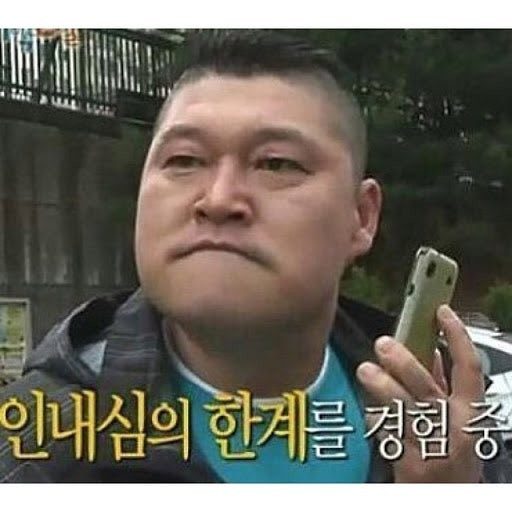

- 데이터 셋은 기상청기상자료개방포털(https://data.kma.go.kr/cmmn/main.do)에서 가져 왔다.

- 데이터는 [일시, 지점, 폭염여부(O/X), 최고체감온도(°C), 최고기온(°C), 평균기온(°C), 최저기온(°C), 평균상대습도(%), 폭염특보(O/X), 폭염영향예보(단계), 열대야(O/X), 자외선지수(단계)]의 테이블로 구성되어 있다.

- 데이터의 기간[일시]는 **2019-05 ~ 2021-07**까지 수집 되었다.

- 53946 rows 구성의 데이터이다.

- 각 컬럼에 NaN값도 존재한다. ==> 그 지역, 그 시기 값의 평균or중위수로 치환

- 데이터[폭염영향예보(단계)] = ' ', '관심', '주의', '경고', '심각'으로 구성
 - ' '는 폭염과 관련 없는 날씨를 의미 하기 때문에 '평시'로 replace

# Contents



1. 데이터 불러오기

2. 누락 값 처리(NaN 처리)

3. 시각화(Visualization)
 - 시계열별 기온(°C) EDA
 - 도시별 기온(°C) EDA

4. Modeling
 - 모델별로


---
# 1. 데이터 불러오기

 - 기상자료개방포털에서 데이터들을 모아 excel작업을 했다.


In [3]:
data = pd.read_excel('/content/drive/MyDrive/dataset/공공데이터/폭염데이터-기상청/기상데이터(폭염).xlsx')
data = data.sort_values('일시')

In [4]:
# 시계열 데이터 처리
data['일시'] = pd.to_datetime(data['일시'], format='%Y-%m-%d')

data['year'] = data['일시'].dt.year
data['month'] = data['일시'].dt.month
data['day'] = data['일시'].dt.day
data['date'] = data['일시'].dt.date

In [5]:
# 지역명 전처리(깔끔)
data['지점'] = data['지점'].apply(lambda x: x.split('(')[0])

Text(0, 0.5, '')

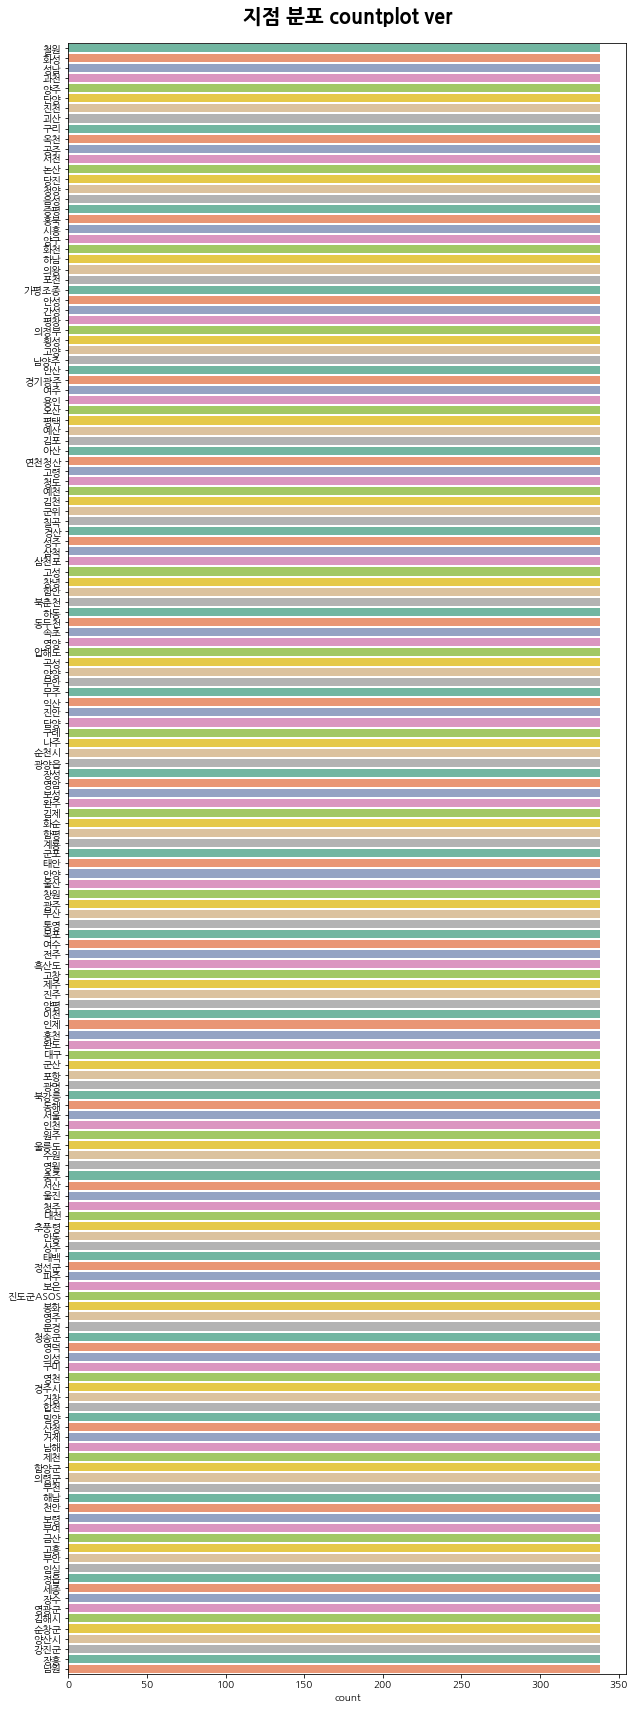

In [6]:
plt.figure(figsize=(10,30))
sns.countplot(y=data['지점'], palette=sns.color_palette('Set2', n_colors=data['지점'].nunique()))
plt.title('지점 분포 countplot ver', fontsize=20, pad=20, fontweight='bold')
plt.ylabel('')

누락된 날짜, 지점은 없는 것으로 해석

---

# 2. 누락 값 처리(Feature Engineering)

In [12]:
# 각 컬럼의 NaN 나타내는 테이블(table)-야매ver
data_isnull = data.isnull().sum().reset_index(name='count')
data_nullmean = data.isnull().mean().reset_index(name='percent')

data_isnull_table = data_isnull.merge(data_nullmean, how='left', on='index').set_index('index').sort_values('percent', ascending=False) 
data_isnull_table
# 폭염영향예보(단계) 누락 값(NaN)은 ' '이다.

,count,percent
index,,
폭염영향예보(단계),1057,0.019304
일시,0,0.000000
지점,0,0.000000
폭염여부(O/X),0,0.000000
최고체감온도(°C),0,0.000000
최고기온(°C),0,0.000000
평균기온(°C),0,0.000000
최저기온(°C),0,0.000000
평균상대습도(%),0,0.000000


In [8]:
# NaN값들을 지점 별로 value_counts(), unstack()한 table ==> 시각화 하기 위해서
# 각 값들은 NaN값의 개수를 나타낸 것

humid = data.groupby('지점')['평균상대습도(%)'].value_counts(dropna=False).unstack().fillna(0).iloc[:,0].reset_index(name='평균상대습도(%)')
sensory = data.groupby('지점')['최고체감온도(°C)'].value_counts(dropna=False).unstack().fillna(0).iloc[:,0].reset_index(name='최고체감온도(°C)')
low = data.groupby('지점')['최저기온(°C)'].value_counts(dropna=False).unstack().fillna(0).iloc[:,0].reset_index(name='최저기온(°C)')
high = data.groupby('지점')['최고기온(°C)'].value_counts(dropna=False).unstack().fillna(0).iloc[:,0].reset_index(name='최고기온(°C)')
mean = data.groupby('지점')['평균기온(°C)'].value_counts(dropna=False).unstack().fillna(0).iloc[:,0].reset_index(name='평균기온(°C)')

null_table = humid.merge(sensory, how='left', on='지점').merge(low, how='left', on='지점').merge(high, how='left', on='지점').merge(mean, how='left', on='지점').set_index('지점')

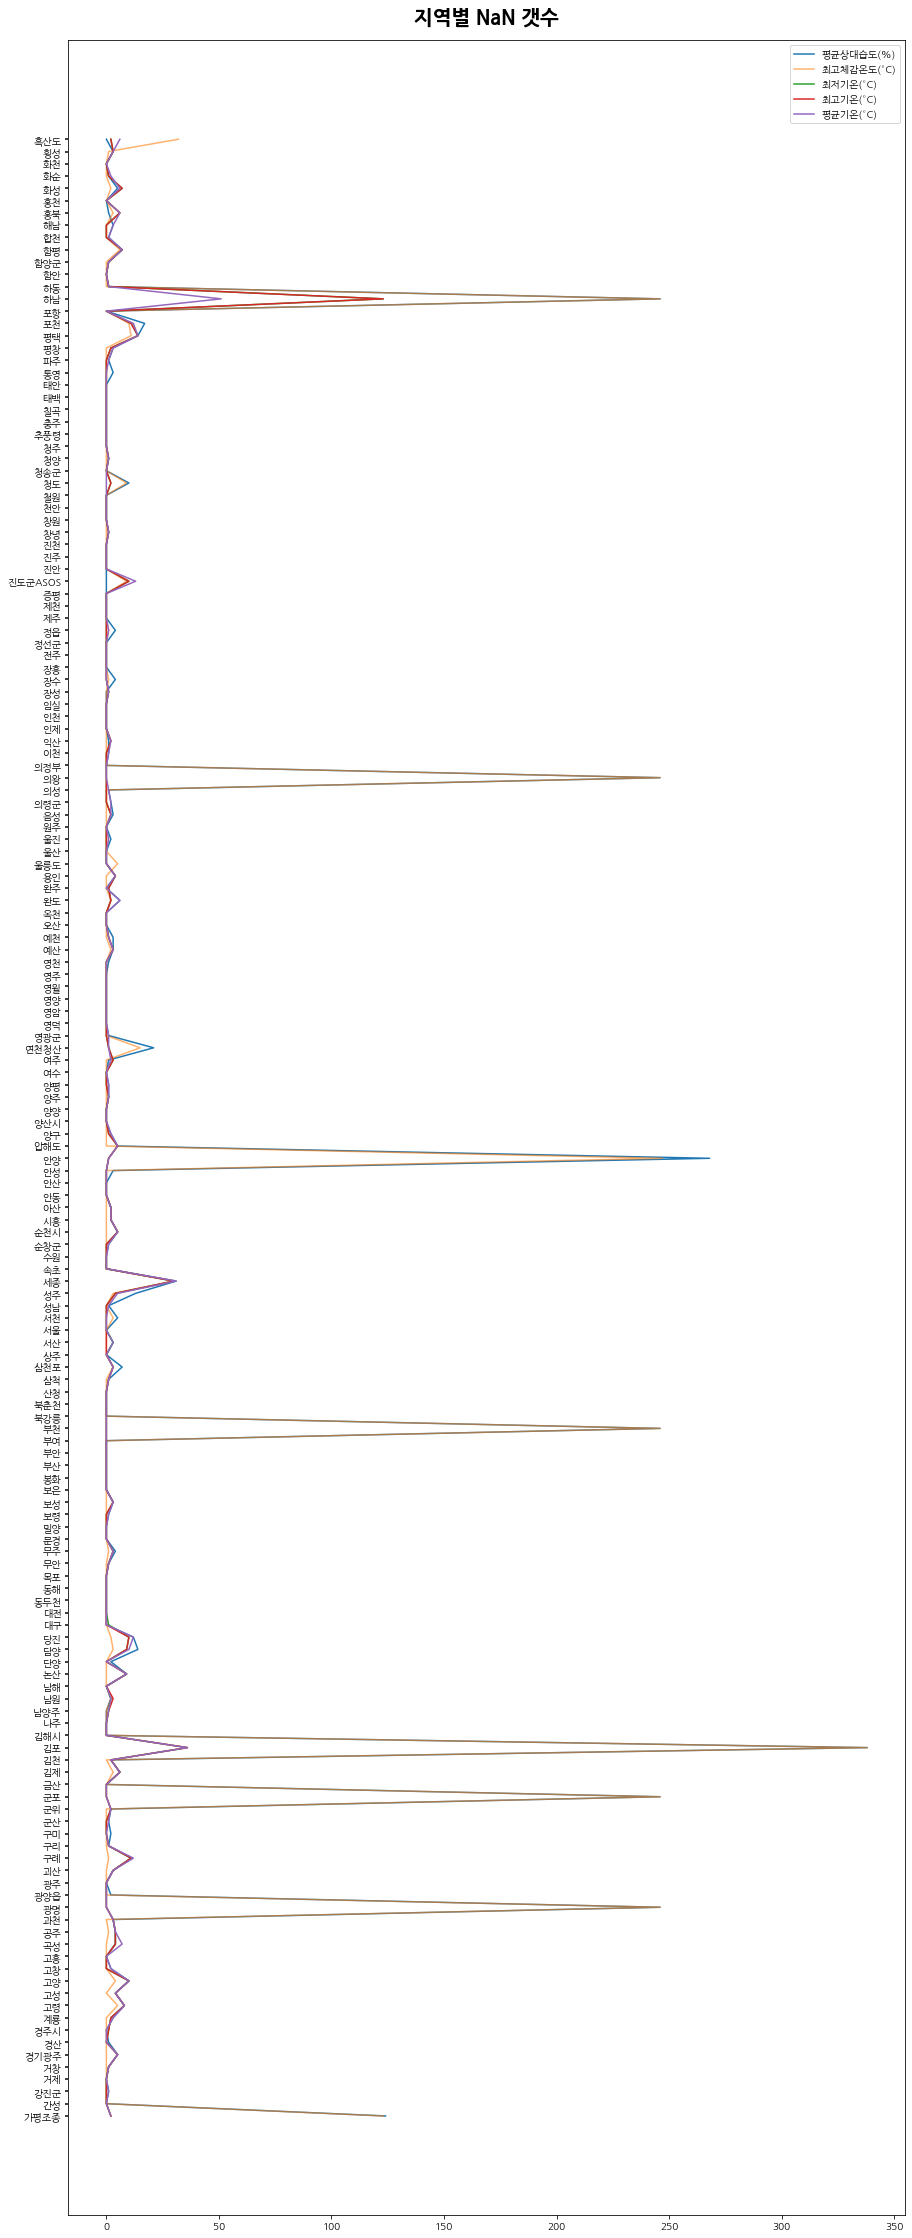

In [9]:
plt.figure(figsize=(15,40))
plt.plot(null_table['평균상대습도(%)'], null_table.index, label='평균상대습도(%)')
plt.plot(null_table['최고체감온도(°C)'], null_table.index, label='최고체감온도(°C)', alpha=0.6)
plt.plot(null_table['최저기온(°C)'], null_table.index, label='최저기온(°C)')
plt.plot(null_table['최고기온(°C)'], null_table.index, label='최고기온(°C)')
plt.plot(null_table['평균기온(°C)'], null_table.index, label='평균기온(°C)') 
plt.title('지역별 NaN 갯수', fontsize=20, pad=18, fontweight='bold')
plt.legend()
plt.tick_params(axis='y', width=1.5)

하남에서는 전체적으로 누락값이 많이 관측되고 [의왕, 안양, 부천, 김포, 군포, 광명, 가평조종]에서는 '최고체감온도', '평균상대습도'가 비슷하게 누락값이 많이 관찰된다.

In [10]:
for i,j,k in zip(data['지점'], data['month'], data['day']):
  data.loc[(data['지점']==i) & (data['평균상대습도(%)'].isnull()) & (data['month']==j) & (data['day']==k), '평균상대습도(%)'] = data.loc[(data['month']==j) & (data['day']==k) & (data['지점']==i)]['평균상대습도(%)'].mean()
  data.loc[(data['지점']==i) & (data['최저기온(°C)'].isnull()) & (data['month']==j) & (data['day']==k), '최저기온(°C)'] = data.loc[(data['month']==j) & (data['day']==k) & (data['지점']==i)]['최저기온(°C)'].mean()
  data.loc[(data['지점']==i) & (data['최고기온(°C)'].isnull()) & (data['month']==j) & (data['day']==k), '최고기온(°C)'] = data.loc[(data['month']==j) & (data['day']==k) & (data['지점']==i)]['최고기온(°C)'].mean()
  data.loc[(data['지점']==i) & (data['평균기온(°C)'].isnull()) & (data['month']==j) & (data['day']==k), '평균기온(°C)'] = data.loc[(data['month']==j) & (data['day']==k) & (data['지점']==i)]['평균기온(°C)'].mean()

  data.loc[(data['지점']==i) & (data['평균상대습도(%)'].isnull()) & (data['month']==j) & (data['day']==k), '평균상대습도(%)'] = data.loc[(data['month']==j) & (data['day']==k)]['평균상대습도(%)'].median()
 

# 시간이 너무 오래걸리니까 day는 사용하지 않고 month의 median값으로 치환 해야 하는 것인가?

In [11]:
data['최고체감온도(°C)'] = data['최고체감온도(°C)'].fillna(data['최고기온(°C)'])

# 누락 값 처리 완료 
- 처리 방법
 - 지점 별로 지난 month, day별 mean값으로 치환
 - '최고체감온도(°C)'컬럼의 누락 값은 그 날의 최고기온으로 치환
 - 전체 기간이 누락된 값은 전체 지점의 median값으로 치환

---

# 3. 시각화 : 기온(°C) EDA

In [15]:
sns.color_palette('RdBu')

[(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]

Text(0.5, 1.0, '평균 기온(Bar ver)')

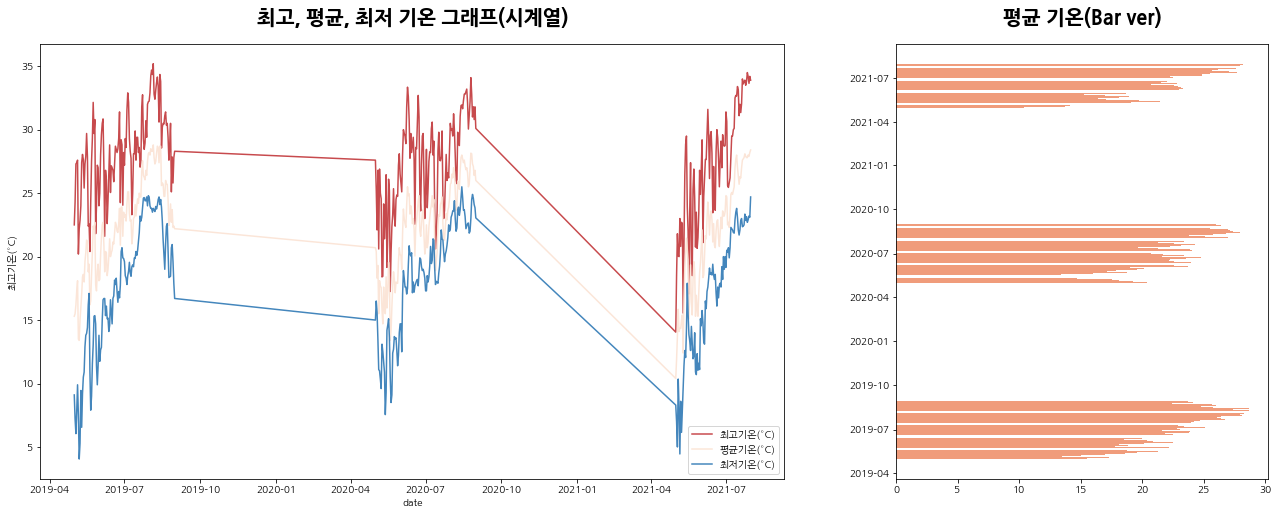

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(22,8), gridspec_kw={'width_ratios':[2, 1]})
sns.lineplot(x=data.groupby(['date'])['최고기온(°C)'].median().index, y=data.groupby(['date'])['최고기온(°C)'].median(), color=sns.color_palette('RdBu')[0], label='최고기온(°C)', ax=ax[0], alpha=0.9)
sns.lineplot(x=data.groupby(['date'])['평균기온(°C)'].median().index, y=data.groupby(['date'])['평균기온(°C)'].median(), color=sns.color_palette('RdBu')[2], label='평균기온(°C)', ax=ax[0], alpha=0.9)
sns.lineplot(x=data.groupby(['date'])['최저기온(°C)'].median().index, y=data.groupby(['date'])['최저기온(°C)'].median(), color=sns.color_palette('RdBu')[5], label='최저기온(°C)', ax=ax[0], alpha=0.9)
ax[0].set_title('최고, 평균, 최저 기온 그래프(시계열)', fontsize=20, fontweight='bold', pad=20)

plt.barh(data.groupby(['date'])['평균기온(°C)'].median().index, data.groupby(['date'])['평균기온(°C)'].median(), color=sns.color_palette('RdBu')[1])
plt.title('평균 기온(Bar ver)', fontsize=20, fontweight='bold', pad=20)


In [38]:
# 연도별로 시각화 하기 위한 전처리
data['월-일'] = data['date'].astype('string').apply(lambda x: x[5:])

year_2019 = data.loc[data['year'] == 2019]
year_2020 = data.loc[data['year'] == 2020]
year_2021 = data.loc[data['year'] == 2021]

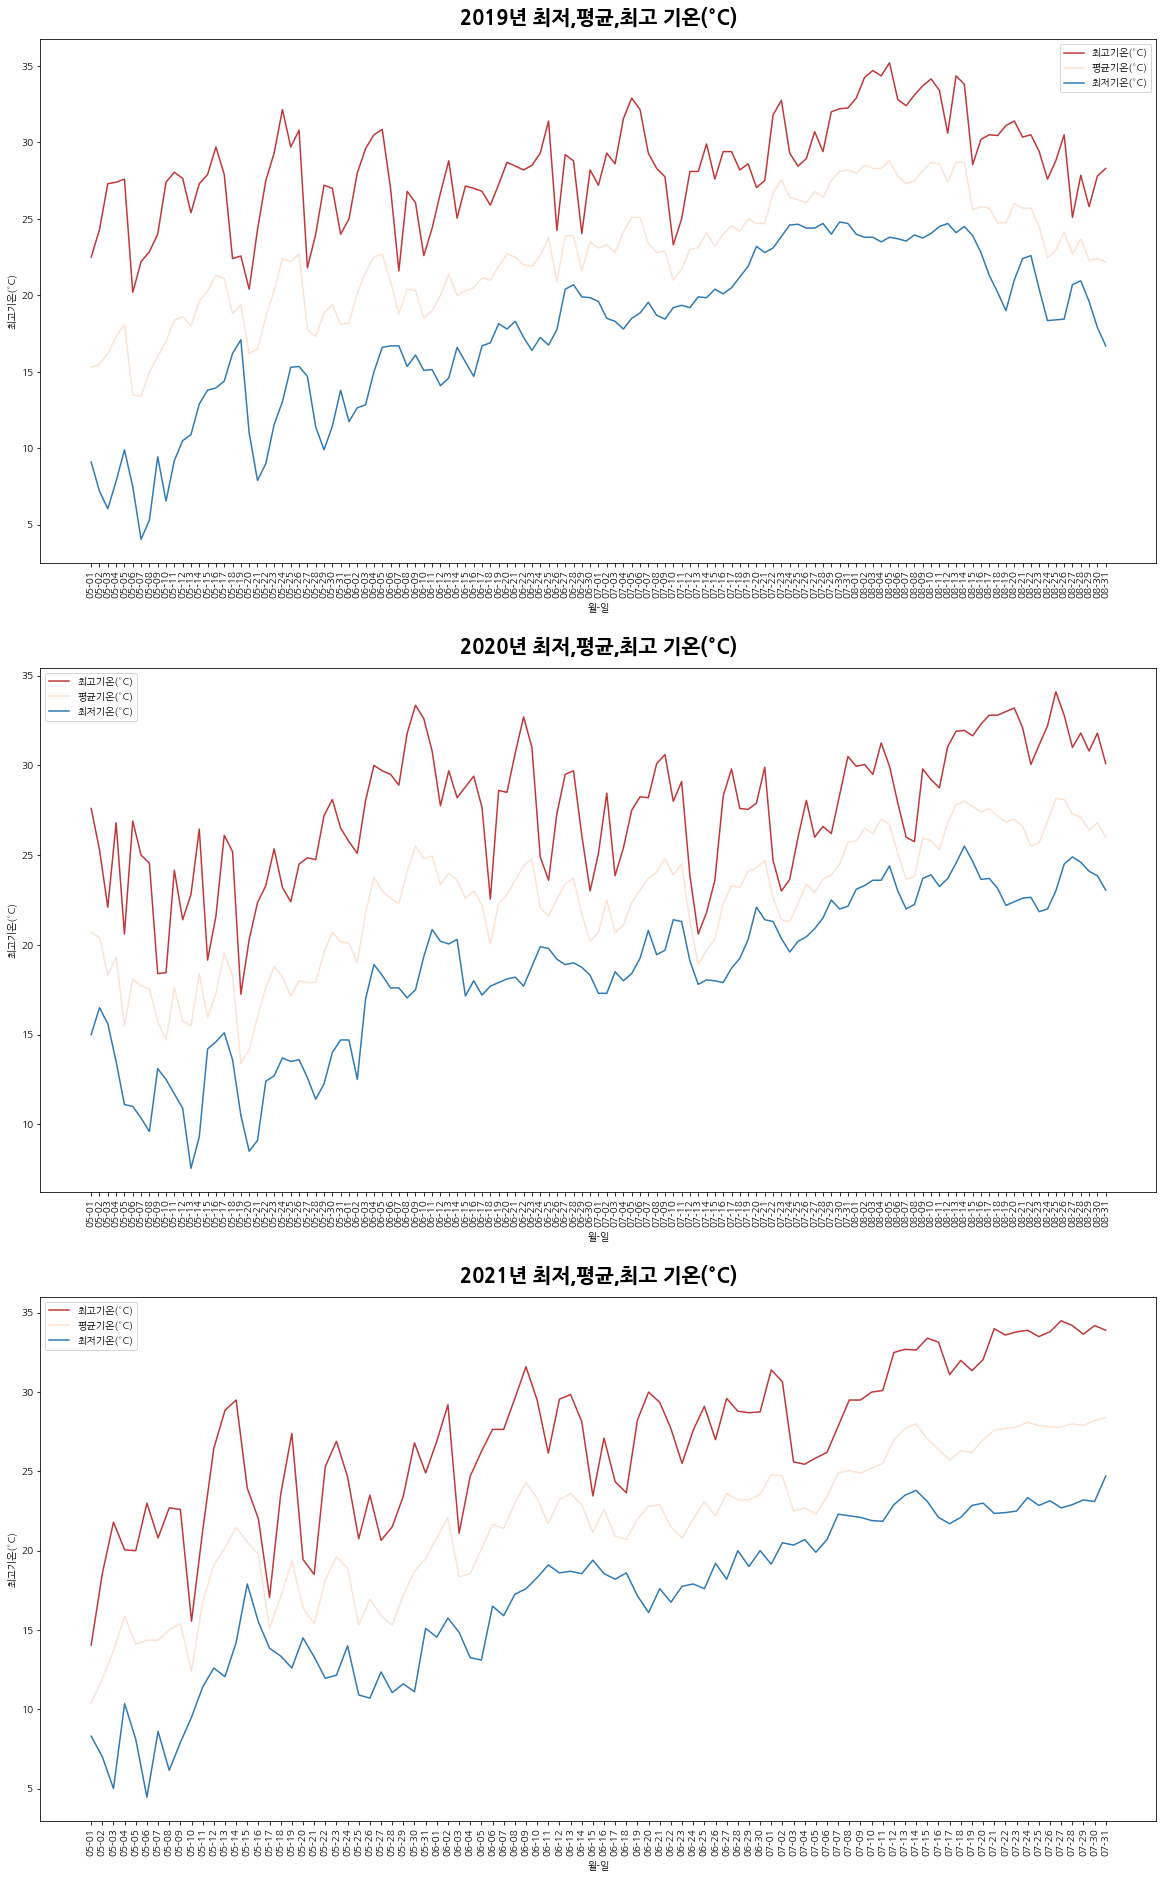

In [ ]:

plt.figure(figsize=(20, 18))
for j,i in enumerate([year_2019, year_2020, year_2021]):
  plt.subplot(3,1, j+1)
  sns.lineplot(x=i.groupby('월-일')['최고기온(°C)'].median().index, y=i.groupby('월-일')['최고기온(°C)'].median(), color=sns.color_palette('RdBu')[0], label='최고기온(°C)')
  sns.lineplot(x=i.groupby('월-일')['평균기온(°C)'].median().index, y=i.groupby('월-일')['평균기온(°C)'].median(), color=sns.color_palette('RdBu')[2], label='평균기온(°C)')
  sns.lineplot(x=i.groupby('월-일')['최저기온(°C)'].median().index, y=i.groupby('월-일')['최저기온(°C)'].median(), color=sns.color_palette('RdBu')[5], label='최저기온(°C)')
  plt.xticks(rotation=90)
  plt.title(f"{i['year'].mode()[0]}년 최저,평균,최고 기온(°C)", fontsize=20, pad=15, fontweight='bold')

plt.subplots_adjust(top=1.5)



In [ ]:
sns.color_palette("gist_heat")

[(0.21176470588235294, 0.0, 0.0),
 (0.4294117647058823, 0.0, 0.0),
 (0.6411764705882352, 0.0, 0.0),
 (0.8588235294117647, 0.1450980392156862, 0.0),
 (1.0, 0.4274509803921569, 0.0),
 (1.0, 0.7176470588235293, 0.4352941176470586)]

Text(0.5, 1.0, '연도별 평균기온(°C) 비교')

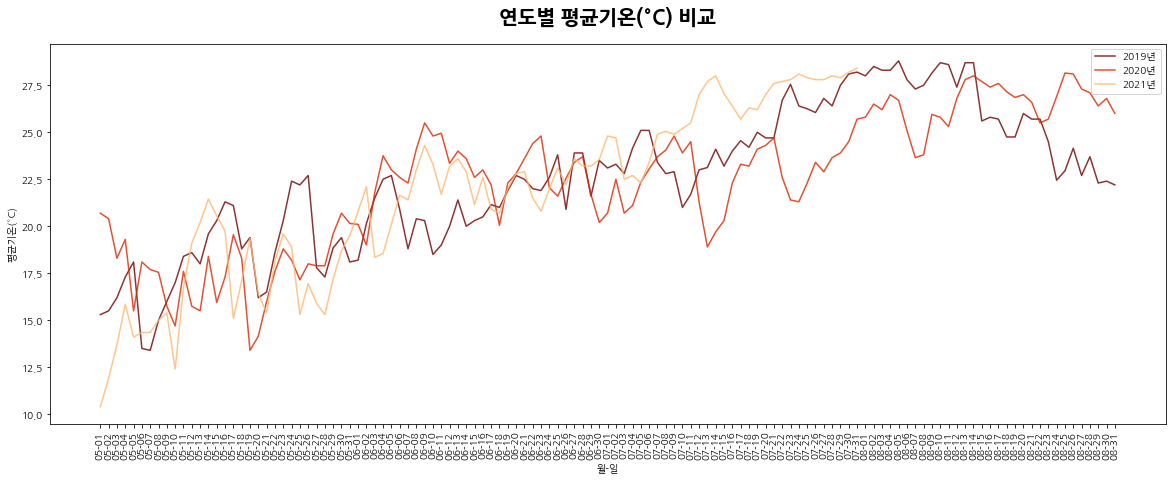

In [ ]:
plt.subplots(figsize=(20, 7))
sns.lineplot(x=year_2019.groupby('월-일')['평균기온(°C)'].median().index, y=year_2019.groupby('월-일')['평균기온(°C)'].median(), color=sns.color_palette("gist_heat")[1], label='2019년', alpha=0.8)
sns.lineplot(x=year_2020.groupby('월-일')['평균기온(°C)'].median().index, y=year_2020.groupby('월-일')['평균기온(°C)'].median(), color=sns.color_palette("gist_heat")[3], label='2020년', alpha=0.8)
sns.lineplot(x=year_2021.groupby('월-일')['평균기온(°C)'].median().index, y=year_2021.groupby('월-일')['평균기온(°C)'].median(), color=sns.color_palette("gist_heat")[5], label='2021년', alpha=0.8)

plt.xticks(rotation=90)
plt.title('연도별 평균기온(°C) 비교', fontsize=20, pad=20, fontweight='bold')
# 연도별 기온 비교는 시각화가 복잡해지기 때문에 plotly로 해야 할 것 같다.

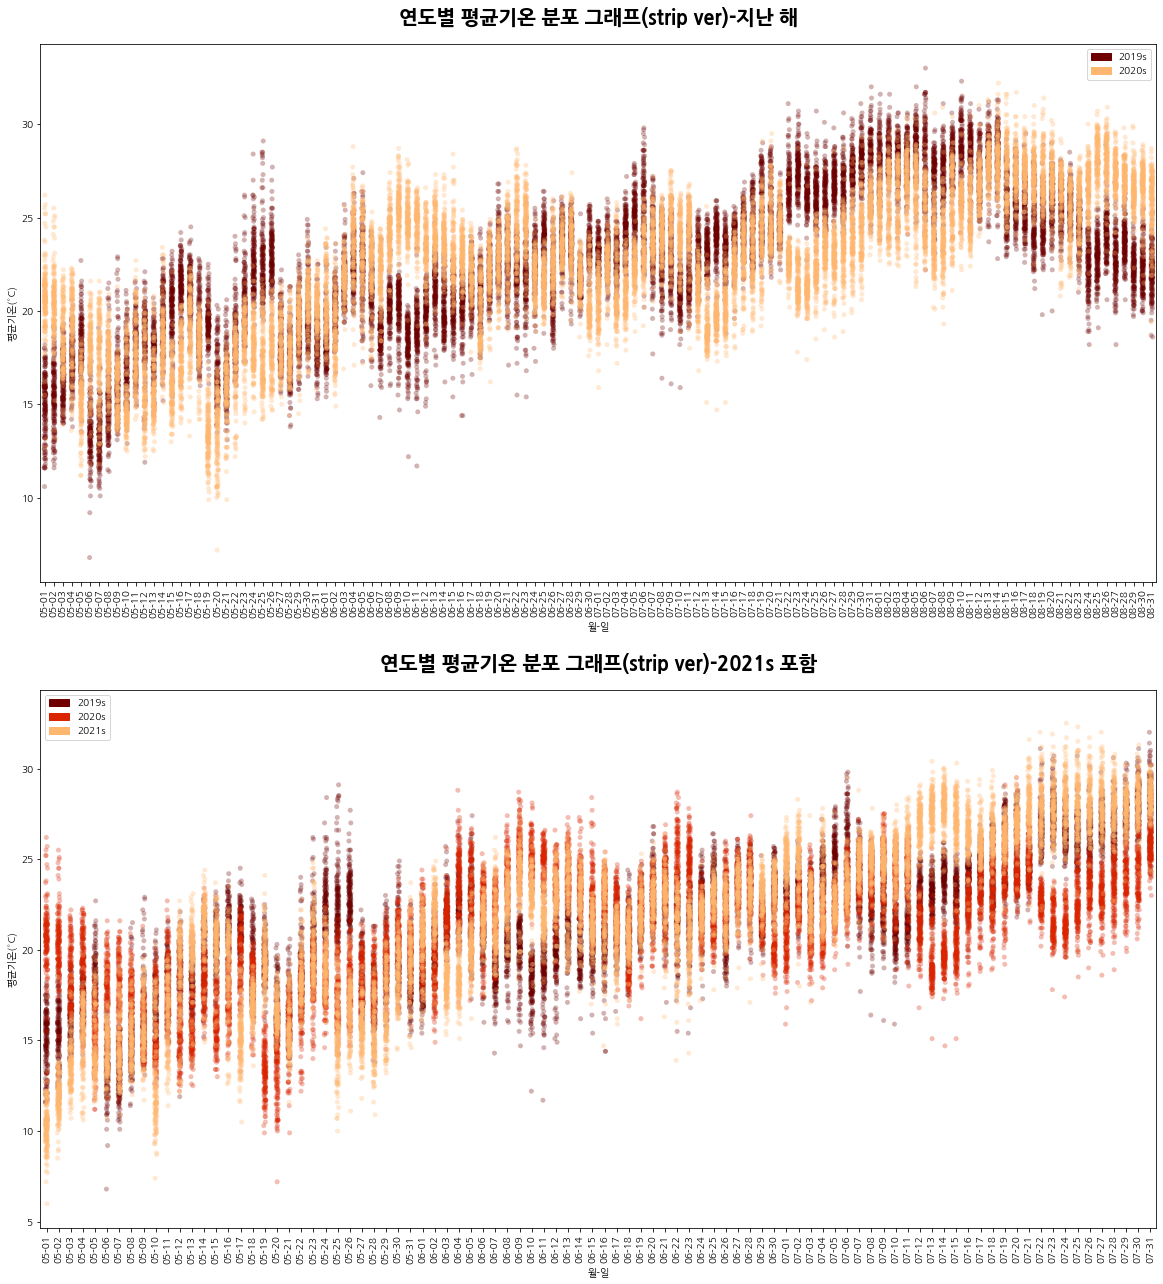

In [68]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(2, 1, figsize=(20,14))
sns.stripplot(x=year_2019['월-일'], y=year_2019['평균기온(°C)'], color=sns.color_palette("gist_heat")[1], alpha=0.3, ax=ax[0])
sns.stripplot(x=year_2020['월-일'], y=year_2020['평균기온(°C)'], color=sns.color_palette("gist_heat")[5], alpha=0.3, ax=ax[0])
# sns.stripplot(x=year_2021['월-일'], y=year_2021['최고기온(°C)'], color=sns.color_palette("gist_heat")[5], alpha=0.3, ax=ax[0])


patch1 = mpatches.Patch(color=sns.color_palette("gist_heat")[1], label='2019s')  # 범례 patch 붙이기 ==> mpatches.Patch() 색깔이 똑같게 설정해야
patch2 = mpatches.Patch(color=sns.color_palette("gist_heat")[5], label='2020s')
# patch3 = mpatches.Patch(color=sns.color_palette("gist_heat")[5], label='2021')
ax[0].legend(handles=(patch1, patch2))
ax[0].set_xticklabels(year_2019['월-일'].unique(), rotation=90)
ax[0].set_title('연도별 평균기온 분포 그래프(strip ver)-지난 해', fontsize=20, pad=20, fontweight='bold')


sns.stripplot(x=year_2019['월-일'], y=year_2019['평균기온(°C)'], color=sns.color_palette("gist_heat")[1], alpha=0.3, ax=ax[1])
sns.stripplot(x=year_2020['월-일'], y=year_2020['평균기온(°C)'], color=sns.color_palette("gist_heat")[3], alpha=0.3, ax=ax[1])
sns.stripplot(x=year_2021['월-일'], y=year_2021['평균기온(°C)'], color=sns.color_palette("gist_heat")[5], alpha=0.3, ax=ax[1])


patch1 = mpatches.Patch(color=sns.color_palette("gist_heat")[1], label='2019s')
patch2 = mpatches.Patch(color=sns.color_palette("gist_heat")[3], label='2020s')
patch3 = mpatches.Patch(color=sns.color_palette("gist_heat")[5], label='2021s')
ax[1].legend(handles=(patch1, patch2, patch3))
plt.xticks(rotation=90)
ax[1].set_title('연도별 평균기온 분포 그래프(strip ver)-2021s 포함', fontsize=20, pad=20, fontweight='bold')

plt.subplots_adjust(top=1.3)

# 연도별 시각화(visualization)로 얻을 수 있는 결론

- 7,8월이 될수록 기온은 높아져 간다.(당연하겠지...)

- 5,6월 최고기온이 30도 이내 일때도 있었다. 하지만 최저기온은 낮아서 평균 온도는 낮았다.

- 2020년은 2019, 2021년과 다르게 month별 평균기온의 차이가 상대적으로 적다.
 - 외부 요인이 작용했을 수도 있다.(강수량, 기압분포...)

- 2019년의 7월 기온을 살펴 보면...
 - 2019년 7월 초 : 평균 기온 19-25도 분포 ==> 낮 기온이 30도를 넘기 시작했지만 저녁에는 시원하기 때문에 살만하다.
 - 2019년 7월 중 : 평균 기온 20-25도 분포 ==> 더위가 슬슬 시작되었다.
 - 2019년 7월 말 : 평균 기온 25-30도 분포 ==> 폭염이 시작 되었다.

- 2020년의 7월 기온을 살펴 보면...
 - 2020년 7월 초 : 15-25도 분포 ==> 2019년도와 비슷하지만 낮 기온이 30도를 넘지 않는다.
 - 2020년 7월 중 : 15-23도 분포 ==> 2019년에 비해 더위가 시작 되지 않고, 낮 기온도 아직 30도를 넘지 않는다.
 - 2020년 7월 말 : 18-25도 분포 ==> 2019년 7월 말은 폭염이 시작되었는데 2020년은 더위가 시작 되지도 않았음.

- 2019년 8월 기온을 살펴보면...
 - 2019년 8월 초 : 평균 기온이 25-33도 분포(지역차) ==> 폭염의 절정
 - 2019년 8월 중 : 평균 기온이 23-28도 분포 ==>  더위가 한 풀 꺾임. 하지만 최고기온 30도를 찍을 만큼 낮에는 덥다.
 - 2019년 8월 말 : 평균 기온이 18-23도 분포 ==> 더위가 완전 가심, 최저기온이 15도를 찍을 정도로 기온이 낮아졌다.(초가을)
 - 결론 : 2019년 여름은 전형적인 우리나라 여름 날씨 

- 2020년 8월 기온을 살펴보면...
 - 2020년 8월 초 : 2019년에 비해 3-4도 가량 평균 기온이 낮다.
 - 2020년 8월 중 : 2019년에 비해 1-2도 가량 평균 기온이 높다.(원래라면 8월 중순에는 기온이 내려가야 되는데 오히려 최고 기온을 찍었다.)
 - 2020년 8월 말 : 2019년에 비해 5-6도 가량 평균 기온이 높다.
 - 결론 : 이상기후(?) 2020년은 다른 해와 다르게 7월말과 8월초에 기온이 낮았다, 하지만 8월 중순부터 본격적인 더위(폭염)가 시작되었다.

- **2021년 7월 초까지는 2019, 2020년과 비슷한 기온이었는데, 2021년 7월 중순 부터 폭염이 시작됨** 


---

# 3. 시각화 : 지역별 EDA

In [17]:
!pip install plotly.express

# 지점별로 시각화

Text(0.5, 1.0, '지점(지역)별 기온 - 평균기온(°C)으로 sort')

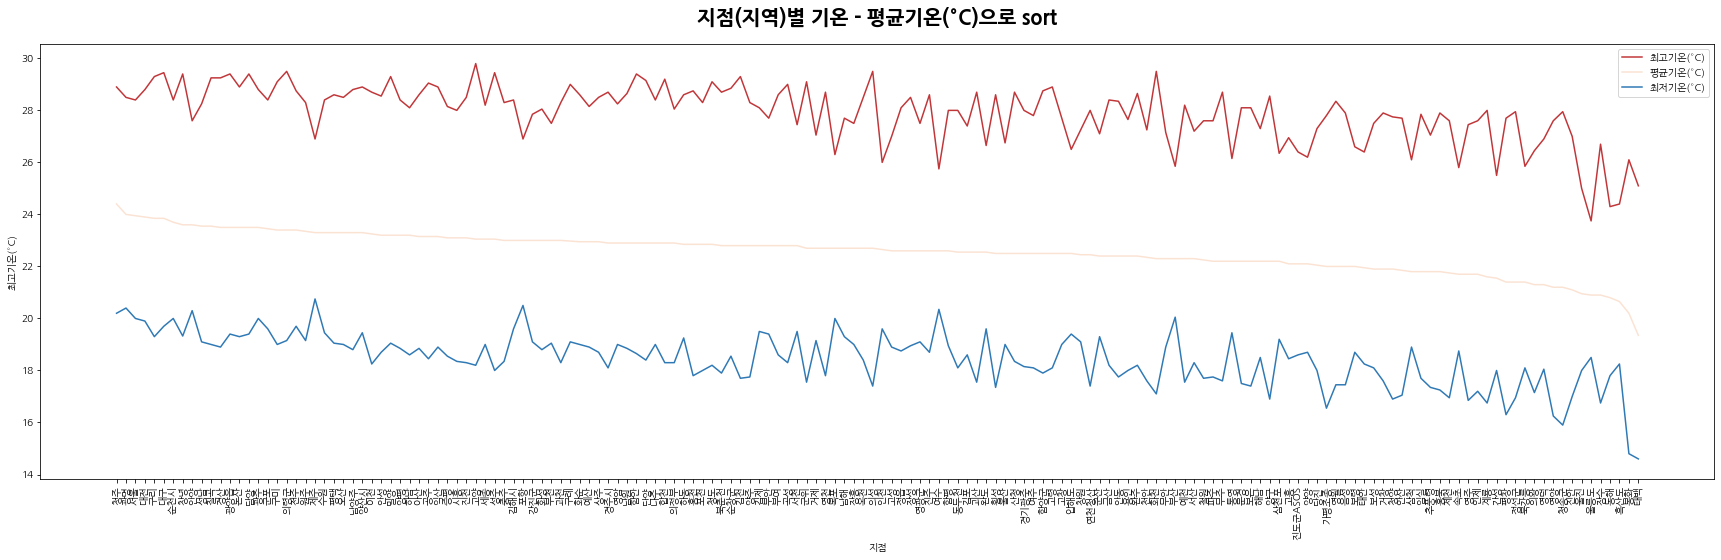

In [18]:
# 평균기온 별로 sort 보기 편하려고
city = data.groupby('지점')[['최고기온(°C)', '평균기온(°C)', '최저기온(°C)']].median().sort_values(by='평균기온(°C)', ascending=False)

plt.figure(figsize=(30,8))
sns.lineplot(x=city.index, y=city['최고기온(°C)'], label='최고기온(°C)', color=sns.color_palette('RdBu')[0])
sns.lineplot(x=city.index, y=city['평균기온(°C)'], label='평균기온(°C)', color=sns.color_palette('RdBu')[2])
sns.lineplot(x=city.index, y=city['최저기온(°C)'], label='최저기온(°C)', color=sns.color_palette('RdBu')[5])
plt.xticks(rotation=90)
plt.title('지점(지역)별 기온 - 평균기온(°C)으로 sort', fontsize=20, pad=20, fontweight='bold')

Text(0.5, 1.0, 'year(연도)로 구별한 지점 기온(2021s 8월 기온이 반영 안되서 뺐다.)')

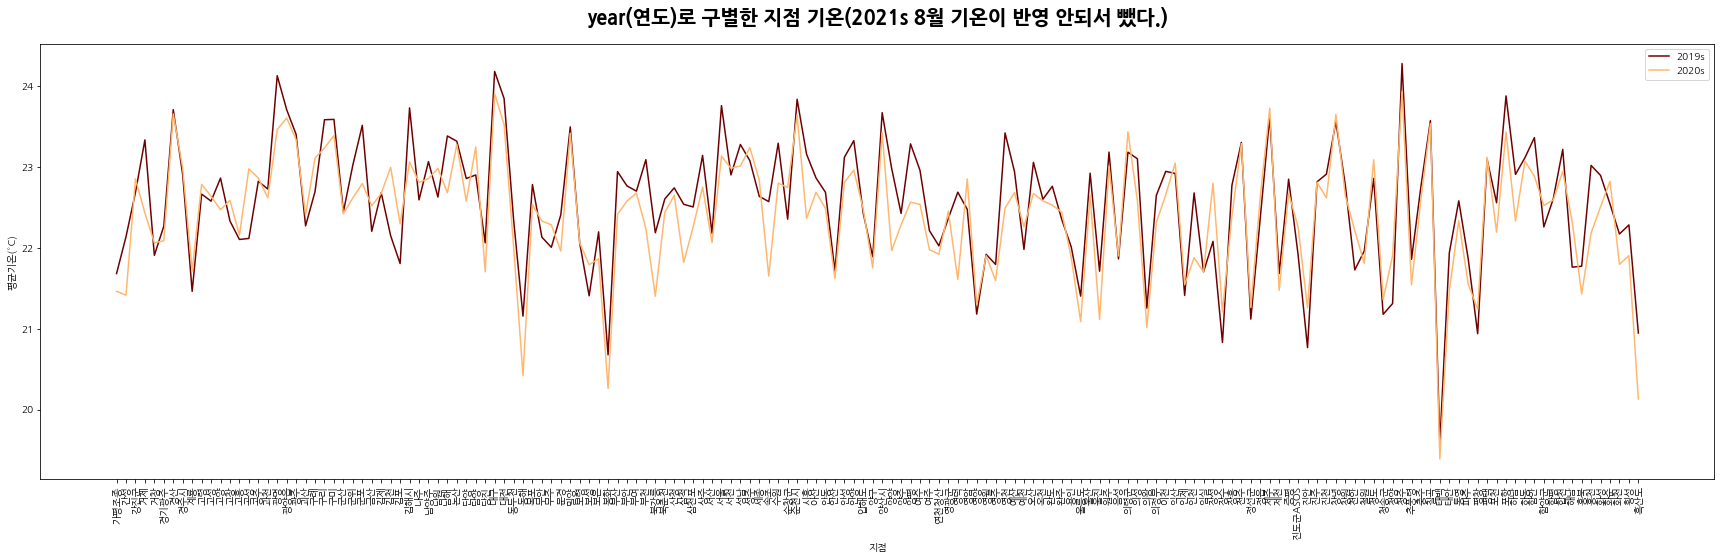

In [44]:
# c_y = data.groupby(['지점', 'year'])['평균기온(°C)'].median().reset_index().sort_values(by='평균기온(°C)', ascending=False)

plt.figure(figsize=(30,8))
# sns.lineplot(x=c_y['지점'], y=c_y['평균기온(°C)'], hue=c_y['year'], palette=sns.color_palette("gist_heat", n_colors=len(c_y['year'].unique())))
sns.lineplot(x=year_2019.groupby('지점')['평균기온(°C)'].mean().index, y=year_2019.groupby('지점')['평균기온(°C)'].mean(), label='2019s', color=sns.color_palette("gist_heat")[1])
sns.lineplot(x=year_2020.groupby('지점')['평균기온(°C)'].mean().index, y=year_2020.groupby('지점')['평균기온(°C)'].mean(), label='2020s', color=sns.color_palette("gist_heat")[5])
plt.xticks(rotation=90)
plt.title('year(연도)로 구별한 지점 기온(2021s 8월 기온이 반영 안되서 뺐다.)', fontsize=20, pad=20, fontweight='bold')
# 2021년 8월 기온이 아직 반영이 안되었다.

Text(0.5, 1.0, '월(month)로 구별한 지점별 평균기온')

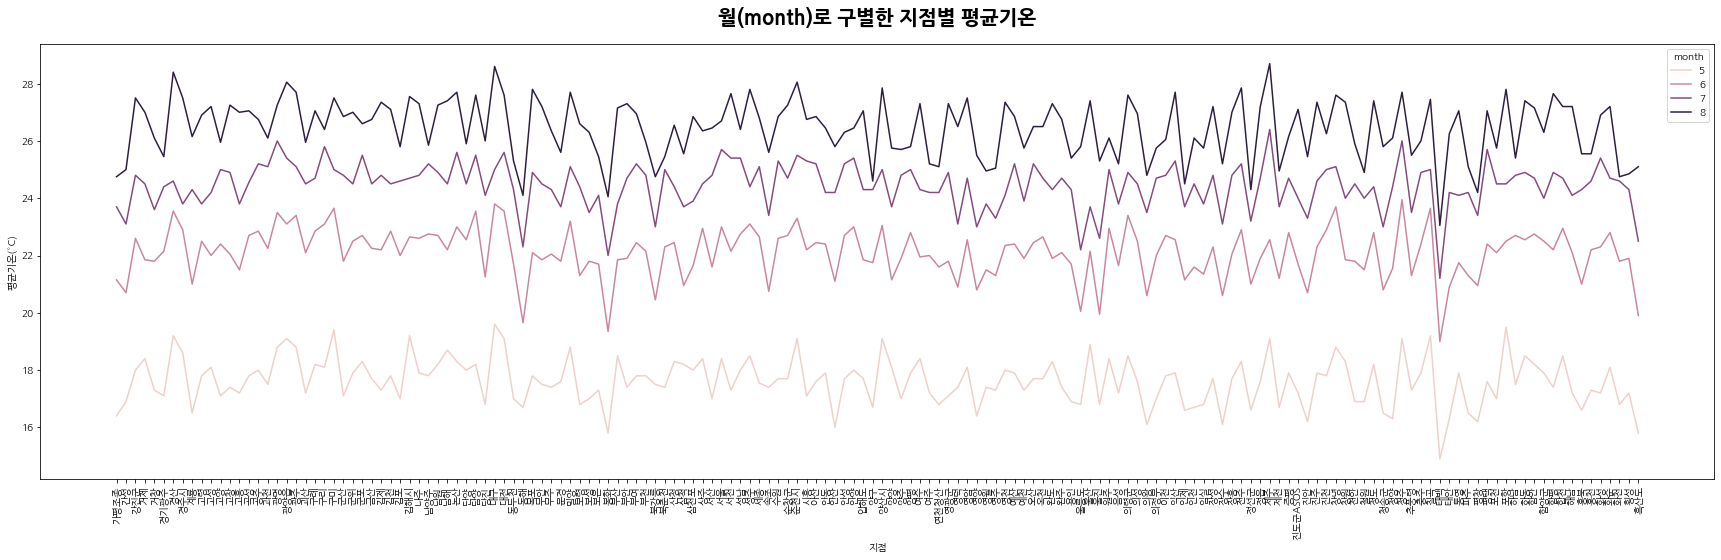

In [19]:
plt.subplots(figsize=(30,8))
sns.lineplot(x=data.groupby(['지점', 'month'])['평균기온(°C)'].median().reset_index()['지점'], y=data.groupby(['지점', 'month'])['평균기온(°C)'].median().reset_index()['평균기온(°C)'], hue=data.groupby(['지점', 'month'])['평균기온(°C)'].median().reset_index()['month'])
plt.xticks(rotation=90)
plt.title('월(month)로 구별한 지점별 평균기온', fontsize=20, pad=20, fontweight='bold')

In [57]:
data.groupby(['지점'])[['최고기온(°C)','최저기온(°C)']].median().reset_index().sort_values(by='최고기온(°C)', ascending=False).reset_index(drop=True).style.bar(subset=['최저기온(°C)'], color='#205ff2').background_gradient(subset=['최고기온(°C)'], cmap='coolwarm')

,지점,최고기온(°C),최저기온(°C)
0,고양,29.800000,18.200000
1,의령군,29.500000,19.150000
2,의성,29.500000,17.400000
3,화천,29.500000,17.100000
4,성주,29.450000,18.000000
5,대구,29.450000,19.700000
6,창녕,29.400000,19.325000
7,광양읍,29.400000,19.400000
8,함안,29.400000,18.650000
9,담양,29.400000,19.400000


# plotly ver

In [ ]:
# 지점이 너무 많다 보니 정적 그래프는 좀 해석이 어렵다 판단하여 plotly
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=city.index, y=city['최고기온(°C)'], name = '최고기온(°C)',
                         line=dict(color='firebrick', width=2)))
fig.add_trace(go.Scatter(x=city.index, y=city['평균기온(°C)'], name = '평균기온(°C)',
                         line=dict(color='rosybrown', width=2)))
fig.add_trace(go.Scatter(x=city.index, y=city['최저기온(°C)'], name = '최저기온(°C)',
                         line=dict(color='royalblue', width=2)))

fig.update_layout(title='지점(지역)별 기온 - plotly ver',
                   xaxis_title='지점',
                   yaxis_title='기온(°C)',)

In [ ]:
c_m = data.groupby(['지점', 'month'])['평균기온(°C)'].median().reset_index()

px.line(data_frame=c_m, x='지점', y='평균기온(°C)', color='month', color_discrete_sequence=px.colors.qualitative.Antique, title='월(month)로 구별한 지점별 평균기온-plotly ver')

# 지역별 시각화 결론
 
 - 2019년 보다 2020년의 평균 기온이 대부분의 지역에서 낮다.(1~3도 가량)

 - 육지에서 멀리 떨어져있는 섬(흑산도, 울릉도...)이거나 영동지방은 7월 최고 기온이 23~26도 일정도로 시원하다.
  - 여름 휴가는 이런 곳으로 가야한다...

 - 제주, 대구, 경산, 대구, 서울... 순으로 7,8월 최고 기온이 28~29도로 덥다.

# To_do

# 1. 시계열 별로 최저, 평균 온도 비교 시각화 계속 하기(완료)

# 2. 지역별로 온도 비교하기(완료)

# 3. 기온과 습도를 가지고 상관관계 나타내기(scatter, heatmap, correlation)

# 4. 폭염여부 classification 하기

# 5. 역대 기온들을 가져와서 비교 ==> 데이터 : 기상청


Text(0.5, 1.0, '연도별 평균기온(°C) 분포')

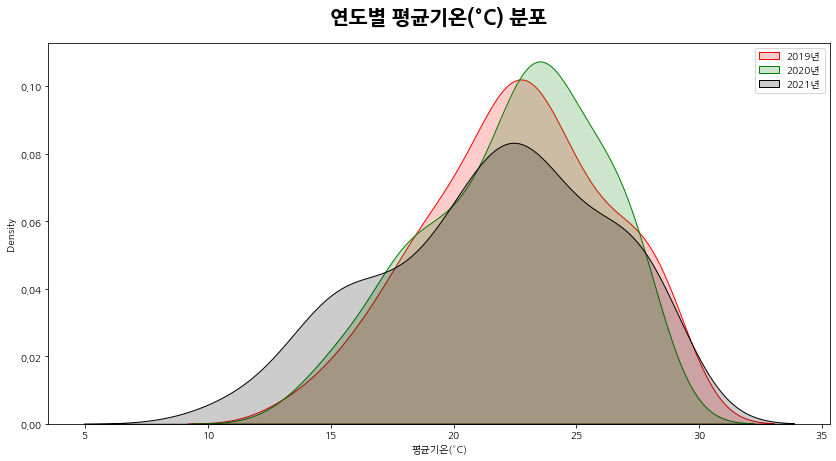

In [ ]:
plt.subplots(figsize=(14, 7))
sns.kdeplot(year_2019.groupby('date')['평균기온(°C)'].median(), color='red', fill=True, label='2019년', alpha=0.2)
sns.kdeplot(year_2020.groupby('date')['평균기온(°C)'].median(), color='green', fill=True, label='2020년', alpha=0.2)
sns.kdeplot(year_2021.groupby('date')['평균기온(°C)'].median(), color='black', fill=True, label='2021년', alpha=0.2)
plt.legend()
plt.title('연도별 평균기온(°C) 분포', fontsize=20, pad=20, fontweight='bold')

# Vizualization 후 알 수 있는 것
 - 이 데이터는 5,6,7,8월 데이터만 있기 때문에 lineplot에서 없는 시계열이 이어지게 나타남

 - 2019년과 2021년의 4,5월 최저기온이 2020년 4,5월 최저기온 보다 낮다.
  - 하지만 최고기온은 2019년이 더 높다 ==> 결과적으로 최저기온은 낮지만 2019년이 2020년보다 더웠다.(강우라는 외부요인 때문 일수도 있다.)

In [ ]:
data['폭염영향예보(단계)'] = data['폭염영향예보(단계)'].replace(' ', '평시')
data['폭염영향예보(단계)'].value_counts()

평시    38913
관심     6223
주의     5717
경고     3082
심각       11
Name: 폭염영향예보(단계), dtype: int64